![](https://drive.google.com/uc?id=1-KqvmRic4EEYrDblHAwY0cne0__2OSsh)

# AI0: The Basics of Data Science
## Homework 2: Linear Regression & Classification

**Univ.AI**<br/>

<hr style="height:2.4pt">

### INSTRUCTIONS

- This homework is a jupyter notebook. You can work on it on the platform (recommended) or download it to your local machine and upload a copy without deleting the **### edTest ###** cells.

- Remember to hit the `Save` button each time you edit this file to avoid losing any progress.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Use the `Run all` button.

- If you choose to download the notebook and work locally, please make sure to retain the same file name when submitting it. To submit the homework, upload the working notebook on the platform and click the `Submit` button on the top right corner. The platform will alert you of a new file with the same name. Click `Overwrite` to continue with your new version.

- `Submit` the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the `import` statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- <i><b>Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code.</b></i>

<hr style="height:2pt">

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
# EDIT THIS CODE TO LOAD THE SAVED DF FROM THE LAST PART OF THE HOMEWORK
df = pd.read_csv('movies_clean.csv')

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **PART 2 [70 points]: Regression and Classification**

In Part 2 of this case study, we will primarily use the following two models: 
- Linear regression for prediction
- k-Nearest Neighbours (kNN) for classification 

We will use linear regression to predict revenue, and we will use kNN to classify whether a movie was profitable or not.

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

# **2.1 Regression [30 points]**

## **2.1.1 Data Preprocessing [10 points]**

We need to prepare the data to be used to perform regression using sklearn's implementation.

### **Instructions**

- Define `regression_target` as `revenue` which is an entry in the original dataframe.
- Define `regression_outcome` as the selection of the labels in the `revenue` column.
- Use the `train_test_split()` function from sklearn to get indices (`itrain`, `itest`) so as to divide the original data. We will use `itrain` to index data to be used for training and `itest` to index data to be used for testing. Use a test size of 20\%.

</div>

In [3]:
# Define `regresssion_target` as 'revenue'
regression_target = df['revenue']

# Fetch the `regression_target` data from the df
regression_outcome = regression_target.values

# Define a list containing the names of all features being used for model training
all_features = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

#Fetch the dataframe containing data of all the features defined in `all_features`
features_df = df[all_features]

In [4]:
### edTest(test_1) ###
## DO NOT REMOVE ABOVE LINE ##

# Get the training and test data by performing train test split
# using sklearn's `train_test_split()` with test size as 20% and random_state=43

# Note that we want to fetch the indices 
# therefore pass the range(len(df)) into the function 
itrain, itest = train_test_split(range(len(df)), test_size=0.20, random_state=43)

# Using itrain, fetch the X_train values from features_df
# HINT: use .iloc[itrain].values
X_train = features_df.iloc[itrain].values

# Using itrain, fetch the y_train values from regression_outcome
y_train = regression_outcome[itrain]

# Using itest, fetch the X_test values from features_df
X_test = features_df.iloc[itest].values

# Using itest, fetch the y_test values from regression_outcome
y_test = regression_outcome[itest]

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **2.1.2 Regression Analysis [10 points]**

In this exercise, we will create a linear regression object, fit it on the training data and make predictions on the test data.
We will then measure its performance by using a metric called `r2_score`.
The `r2_score` is a measure of how well the linear regression describes the data (similar to accuracy in classification).
Read more about `r2_score` [here](https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/).

For classification models in part 2, we will use accuracy as the performance measure.

### **Instructions** 

- Instantiate a `LinearRegression()` object and name it `linear_regression`.
- Call its `.fit()` method on the `X_train,y_train` defined above.
- Call its `.predict()` method on `X_test` and store the predictions as `y_pred`.
- Use sklearn's implementation of `r2_score()` and report its value.

</div>

In [5]:
### edTest(test_2) ###
## DO NOT REMOVE ABOVE LINE ##

# Instantiate a LinearRegression object using sklearn
linear_regression = LinearRegression()

# Fit X_train and y_train using linear_regression object
linear_regression.fit(X_train, y_train)

# Call predict on linear_regression object using X_test
y_pred = linear_regression.predict(X_test)

# Calculate r2_score by using sklearn's built-in function for the same
r2score = r2_score(y_test, y_pred)
print(f"The R2 Score is {r2score:.4f}")

The R2 Score is 0.4568


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **2.1.3 Regression Analysis without outliers [10 points]**

In Exercise 2, we saw that predicting revenue was only moderately successful. It might be the case that predicting movies with actually zero revenue is difficult. 

In the next three exercises, we will exclude these movies, and re-run the analyses to determine if the fits improve. One may understand this as 'cleaning' the outliers, a step often performed in order to make sure that these extreme values do not mess with the data distribution. 

In this exercise, we will rerun the regression analysis for this subsetted dataset without the so-called 'outliers'.

### **Instructions**

- Define `positive_revenue_df` as the subset of movies in `df` with `revenue` greater than zero.
- Make a function that automates the splitting of the dataframes from before

</div>

In [6]:
# Fetch subset of df that contains 'revenue' > 0
positive_revenue_df = df[df['revenue'] > 0]

# Define `regresssion_target` as 'revenue' 
regression_target = 'revenue'
regression_outcome = positive_revenue_df[regression_target]

# Fetch the `regression_target` data from the positive_revenue_df
features_df = positive_revenue_df[all_features]

In [7]:
# Modularise the train_test_split steps in function
# Input: features_dataframe, regression_outcome, test_size
# Output: X_train, y_train, X_test, y_test
def get_datasets(features_df_, regression_outcome_, test_size):
    
    # Get the training and test data by performing train test split as above
    # Remember to use the test_size as mentioned in the function parameter and random_state = 43
    itrain, itest = train_test_split(range(len(features_df_)), test_size=test_size, random_state=43)
    
    # Using itrain, fetch the X_train values from features_df_
    X_train = features_df_.iloc[itrain].values
    
    # Using itrain, fetch the y_train values from regression_outcome_
    y_train = regression_outcome_.iloc[itrain].values
    
    # Using itest, fetch the X_test values from features_df_
    X_test = features_df_.iloc[itest].values
    
    # Using itest, fetch the y_test values from regression_outcome_
    y_test = regression_outcome_.iloc[itest].values

    return X_train, y_train, X_test, y_test

In [8]:
### edTest(test_3) ###
## DO NOT REMOVE ABOVE LINE ##

# Call the `get_datasets` function on the `features_df` and `regression_outcome`
# with test size 20% 
X_train, y_train, X_test, y_test = get_datasets(features_df, regression_outcome, test_size=0.20)

# Reinstantiate the regression model
linear_regression = LinearRegression()

# Fit X_train and y_train using linear_regression object
linear_regression.fit(X_train, y_train)

# Call predict on linear_regression object using X_test
y_pred = linear_regression.predict(X_test)

# Calculate the r2_score using sklearn's built-in function
# This score should not match the score from the previous section!
r2score = r2_score(y_test, y_pred)
print(f"The R2 Score without outliers is {r2score:.4f}")

The R2 Score without outliers is 0.6420


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
# **2.2 Classification [40 points]**

In this section, we will attempt to classify if a movie is `profitable` or not. To do so, we will use the k-Nearest neighbours classification algorithm. Below is an overview of the algorithm for performing k-NN classification.

## **k-Nearest Neighbours Algorithm**

1. Load the training data

2. Initialize `k` to your chosen number of nearest neighbors.

3. Calculate the distances between the test example and every training example using euclidean distances.

4. Find the first `k` *nearest* training entries.

5. Get the labels of the selected `k` entries.

6. Get the most frequent label among the `k` entries.

7. In case of tie, flip a coin and pick one of the two labels.

![](https://i.ibb.co/zGWG1MT/knn-classify.png)

Read [this](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761) article for a through introduction to the kNN algorithm.

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **2.2.1 Data Preprocessing [10 points]**

Before you build your own kNN classifier, let us prepare the the data.

### **Instructions** 

- Define `classification_target` as `profitable` which is an entry in the original dataframe.
- Define `classification_outcome` as the selection of the labels in the `profitable` column.
- Use the same split (`itrain`, `itest`) as before but this time select the output on the `classification_outcome` instead and name it as `y_train_classification` and `y_test_classification`.

</div>

In [9]:
# Define `classification_target` as 'profitable`
classification_target = 'profitable'

# Fetch the `classification_target` data from the df
classification_outcome = df[classification_target]

# Define a list containing the names of all features being used for model training
all_features = ['budget', 'popularity', 'runtime', 'vote_count', 'vote_average', 'Action', 'Adventure', 'Fantasy', 
                  'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 
                  'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'TV Movie', 'Foreign']

#Fetch the dataframe containing data of all the features defined in `all_features`
features_df = df[all_features]

In [10]:
### edTest(test_4) ###
## DO NOT REMOVE ABOVE LINE ##

# Call the `get_datasets` function on the `features_df` and `classification_outcome`
# with test size 20% 
X_train, y_train_classification, X_test, y_test_classification =  get_datasets(features_df, classification_outcome, test_size=0.20)

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
##  **2.2.2 Custom k-Nearest Neighbours Classifier**

It's finally time to build your `myKNN` classifier class!

### **Instructions**

- Follow the instructions in the `__init__` docstring.
- Declare an instance method `fit`, which intializes two attributes, `self.X_train` and `self.y_train`.
- Declare an internal instance method called `_vote` which performs voting between the k nearest labels and returns an overall predicted label based on the count.
- Declare an instance method `predict` which takes test values, performs the k nearest neighbors search using the algorithm mentioned above, and returns a set of predicted labels. You will need your `_vote` method here. 

Follow the docstrings more for detailed instructions.

</div>

In [11]:
np.random.seed(0)

#Create your myKNN Class
class myKNN:
    
    def __init__(self, n_neighbors=3):
        """
        Initializes the classifier with the number of neighbors. 
        (Set a default value of 3). 
        Save the result as k. 
        """
        self.k = n_neighbors
    
    def fit(self, X_train, y_train):
        """
        Initializes instance variables X_train and y_train with 
        respective values.   .    
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def _vote(self, labels):
        """
        Takes the nearest neighbors, takes a mean vote (their average label) 
        INSTRUCTIONS
        1. take the mean vote
        2. if there is a tie, add to or subtract from `mean_vote` a random positive or negative amount
        3. if the mean vote is greater than 0.5 return 1, else return 0
        """

        # 1
        mean_vote = np.mean(labels)
        
        # 2
        if mean_vote == 0.5:
            mean_vote += np.random.randint(-1000,1000)/1e6
        
        # 3
        return 1 if mean_vote > 0.5 else 0   
        
    def predict(self, X_test):
        """If you have trouble with this exercise take a look again at exercise 3 from session 7 : Fundamentals of numpy for datascience
        INSTRUCTIONS
        1. Calculate the distances between the test example and every training example using euclidean distances.
        2. Find the first k nearest training entries.
        Use np.argsort to find the indices of the nearest labels. Documentation for np.argsort here: https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
        3. cast the np.array to integers.
        4. apply the _vote method along the proper axis such that you return the majority vote
           for the nearest neighbors of each point in the test set
           Documentation for `np.apply_along_axis here => https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html
        """

        # 1
        comparisons = ((X_test.reshape(X_test.shape[0], 1, X_test.shape[1]) - self.X_train)**2).sum(axis=2)

        # 2
        nearest_neighbors = np.argsort(comparisons, axis=1)[:, :self.k]

        # 3
        nearest_labels = self.y_train[nearest_neighbors]
        nearest_labels = nearest_labels.astype(int)
        
        # 4
        predictions = np.apply_along_axis(self._vote, axis=1, arr=nearest_labels)
        
        # Return predictions
        return predictions
                

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **2.2.3 Custom kNN Classifier Implementation [10 points]**

Time to use your `myKNN` classifier class to intiantite a classifer and make a prediction.

### **Instructions**

- Intialize an object of `myKNN` and name it `knn_classifier` with `k=4`.
- Call the `.fit()` method on `X_train` and `y_train`.
- Call the `.predict()` method on `X_test` and store the predictions as `classification_predictions`.
- Call the `accuracy_score` function and report the accuracy of the predictions as compared to `y_test`.

</div>

In [12]:
### edTest(test_5) ###
## DO NOT REMOVE ABOVE LINE ##

# Instantiate myKNN Classifier with 4 neighbours
knn_classifier = myKNN(n_neighbors=4)

# Fit X_train and y_train on your newly instantiated classifier 
knn_classifier.fit(X_train, y_train_classification)

# Predict on X_test using the trained classifer
classification_predictions = knn_classifier.predict(X_test)

# Get the accuracy score by using `accuracy_score` from sklearn.metrics
accuracy = accuracy_score(y_test_classification, classification_predictions)
print(f"Accuracy of myKNN classifier is {accuracy*100:.2f}%")
classification_predictions

Accuracy of myKNN classifier is 76.24%


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
    
## **2.2.4 SciKit-Learn's k-Nearest Neighbours Classifier [15 points]**

Compare your implementation with the `sklearn`'s version of kNN classifier.

### **Instructions**

- Intialize the sklearn classifier with `n_neighbors=4` with the variable name `sknn`.
- Call the `.fit()` method of the classifier. 
- Call the `.predict()` method on `X_test` and store the predicted labels as `skclassification_predictions`.
- Call the `accuracy_score` function to compare the predictions with the test set.
- Compare the predictions of your custom classifier with the sklearn's implementation.

</div>

In [13]:
### edTest(test_6) ###
## DO NOT REMOVE ABOVE LINE ##

# Instantiate KNeighborsClassifier with 4 neighbours
sknn = KNeighborsClassifier(n_neighbors=4)

# Fit X_train and y_train on your newly instantiated classifier 
sknn.fit(X_train, y_train_classification)

# Predict on X_test using the trained classifer
skclassification_predictions = sknn.predict(X_test)

# Get the accuracy score by using `accuracy_score` from sklearn.metrics
accuracy = accuracy_score(y_test_classification, skclassification_predictions)
print(f"Accuracy of sklearn's kNN classifier is {accuracy*100:.2f}%")
print(skclassification_predictions)

Accuracy of sklearn's kNN classifier is 76.24%
[1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1
 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1]


In [14]:
### edTest(test_7) ###
## DO NOT REMOVE ABOVE LINE ##

# Checking to see if predictions from both the classifiers are same
result = all(skclassification_predictions == classification_predictions)
print("The predictions from the myKNN classifier and sklearn's kNN classifier are the same?")
print(result)

The predictions from the myKNN classifier and sklearn's kNN classifier are the same?
False


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


### ⏸ **Pause & Think [5 points]**

Change the no. of neighbours from an 4 to 3 and perform comparisons on custom classifier vs. sklearn's classifier. Are the predictions still the same? What is the pattern you are observing?

```
A. Predictions are same for both classifiers when k is odd. 
B. Predictions are same for both classifiers when k is even. 
C. Predictions are same for both classifiers when k is prime. 
D. Predictions are same for both classifiers when k is multiple of 23.
```

</div>

In [15]:
### edTest(test_8) ###
## DO NOT REMOVE ABOVE LINE ##

#-------------CUSTOM---------------#

# Instantiate myKNN Classifier with 3 neighbours
knn_classifier = myKNN(n_neighbors=3)

# Fit the training data using the myKNN Classifier
knn_classifier.fit(X_train, y_train_classification)

# Predict on X_test using the trained classifer
classification_predictions = knn_classifier.predict(X_test)

#------------SKLEARN--------------#

# Instantiate sklearn's KNeighborsClassifier with 3 neighbours
sknn = KNeighborsClassifier(n_neighbors=3)

# Fit the training data using the sklearn's kNN Classifier
sknn.fit(X_train, y_train_classification)

# Predict on X_test using the trained classifer
skclassification_predictions = sknn.predict(X_test)


#------------COMPARISON--------------#

# Checking to see if predictions from both the classifiers are same
print("The predictions from the myKNN classifier and sklearn's kNN classifier are the same?")
print(all(skclassification_predictions == classification_predictions))


# Mention your answer for the Pause & Think question here - for example: 'A'
answer = 'A'

The predictions from the myKNN classifier and sklearn's kNN classifier are the same?
True


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

### **Investigation of the behaviour observed**

Isn't it surprising to see the difference in the accuracy between odd and even number of neighbours in our custom versus that of sklearn? Let's go investigate why this is happening.

</div>

In [16]:
# Function to flip labels i.e if ground truth label is 1, it will now be 0 
# and vice versa. 
def flip_labels(labels):
    return (labels + 1)%2

In [17]:
# Helper function to fit and run the data based on the input for custom or sklearn classifier
def fit_and_run(y_train, y_test, sk_learn = True, flip = False, n_neighbors = 3):
    
    if flip:
        y_train = flip_labels(y_train)
        y_test = flip_labels(y_test)
    
    if sk_learn:
        sknn_ = KNeighborsClassifier(n_neighbors = n_neighbors)
        sknn_.fit(X_train, y_train)
        preds = sknn_.predict(X_test)
        acc_score = accuracy_score(preds, y_test)
        return acc_score
    else:
        knn_ = myKNN(n_neighbors = n_neighbors)
        knn_.fit(X_train, y_train)
        preds = knn_.predict(X_test)
        acc_score = accuracy_score(preds, y_test)
        return acc_score

In [18]:
# Call the function defined below to  for sklearn
n_neighbors = 4
accuracy_sk = fit_and_run(y_train_classification, y_test_classification , sk_learn = True, n_neighbors = n_neighbors)
print(f"Accuracy of sklearn's kNN classifier is {accuracy_sk*100:.2f}%")
accuracy_sk_flip = fit_and_run(y_train_classification, y_test_classification, sk_learn = True, flip = True, n_neighbors = n_neighbors)
print(f"Accuracy of sklearn's kNN classifier with flipped labels is {accuracy_sk_flip*100:.2f}%")

Accuracy of sklearn's kNN classifier is 76.24%
Accuracy of sklearn's kNN classifier with flipped labels is 79.43%


In [21]:
# Call the function defined above for custom implementation
n_neighbors = 4
accuracy_mk = fit_and_run(y_train_classification, y_test_classification , sk_learn = False, n_neighbors = n_neighbors)
print(f"Accuracy of myKNN classifier is {accuracy_mk*100:.2f}%")
accuracy_mk_flip = fit_and_run(y_train_classification, y_test_classification, sk_learn = False, flip = True, n_neighbors = n_neighbors)
print(f"Accuracy of myKNN classifier with flipped labels is {accuracy_mk_flip*100:.2f}%")

Accuracy of myKNN classifier is 78.37%
Accuracy of myKNN classifier with flipped labels is 79.43%


Flipping of labels should not necessarily affect the accuracy of the model since at the end, the model is looking at the same thing. To understand this better, imagine you are classifying if an image is that of a dog or cat. In one case the dog label can be represented as 1 and cat as 0, or vice versa. 

In both these cases, there is no impact on model training/accuracy since it is merely a representation choice. But why is it that we observe a difference in accuracy in sklearn's classifier?

In [22]:
# Run over several values of k and with the labels flipped
knn = []
knn_flipped = []
sklearn = []
sklearn_flipped = []

for n_neighbors in range(1, 50):
    knn1 = fit_and_run(y_train_classification, y_test_classification, sk_learn = False, flip = False, n_neighbors = n_neighbors)
    knn2 = fit_and_run(y_train_classification, y_test_classification, sk_learn = False, flip = True, n_neighbors = n_neighbors)
    sk1 = fit_and_run(y_train_classification, y_test_classification, sk_learn = True, flip = False, n_neighbors = n_neighbors)
    sk2 = fit_and_run(y_train_classification, y_test_classification, sk_learn = True, flip = True, n_neighbors = n_neighbors)   
    knn.append(knn1)
    knn_flipped.append(knn2)
    sklearn.append(sk1)
    sklearn_flipped.append(sk2)

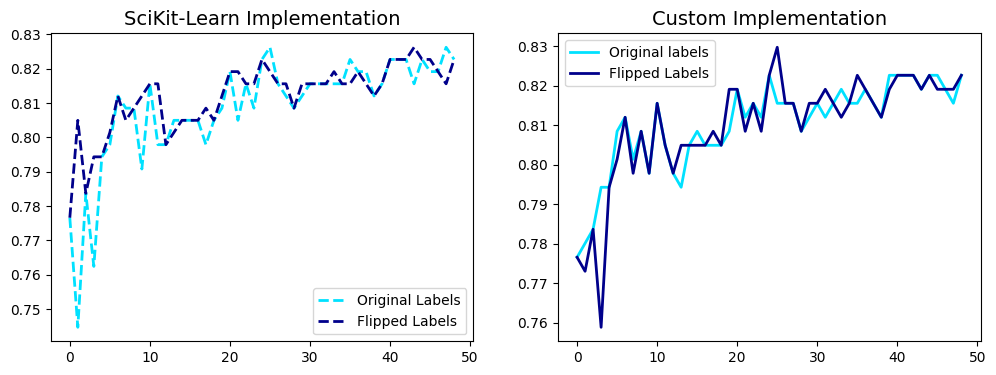

In [23]:
# Run this cell below to visualize the output
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(sklearn, '--', label = 'Original Labels', color = '#00e1ff',lw=2)
ax[0].plot(sklearn_flipped, '--', label = 'Flipped Labels', color='darkblue',lw=2)
ax[0].set_title('SciKit-Learn Implementation', fontsize=14)
ax[0].legend()

ax[1].plot(knn, label='Original labels', color='#00e1ff', lw=2)
ax[1].plot(knn_flipped, label='Flipped Labels', color='darkblue', lw=2)
ax[1].set_title('Custom Implementation', fontsize=14)
ax[1].legend()

plt.show()

Upon investigation of the method employed to classify labels that are exactly mid point between two choices, sklearn's classifier is made to choose the default answer as the least-value label. 

For example, if we had [1,0,1,0,1,0], where there are equal numbers of 1 and equal numbers of 0, what would the KNN Classifer classify this as? In the case of sklearn's implementation it seems to be taking 0, the least-value label. By observing the last graph visualized, clearly the accuracy in sklearn seems to be hindered due to this method of implementation. 

However, when you implemented your own KNNClassifer, remember that in the case of an equal mean case, we randomly add or subract a number from the `mean_vote`. This has improved the accuracy, allowing for the model to perform relatively better than sklearn's implementation! 